# Advanced Data Storytelling: The Titanic Tragedy

This notebook demonstrates advanced data storytelling using the Titanic dataset, following a classic narrative structure:

- **Setup**: Introducing the context and data
- **Conflict**: Highlighting the key challenges and disparities
- **Resolution**: Analyzing and resolving the main questions with data insights

Let's embark on this journey to uncover the story behind the Titanic disaster.

## 1. Import Required Libraries and Titanic Dataset

First, we'll import the necessary libraries and load the Titanic dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the shape and first few rows
titanic.shape, titanic.head()

((891, 15),
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 3         1       1  female  35.0      1      0  53.1000        S  First   
 4         0       3    male  35.0      0      0   8.0500        S  Third   
 
      who  adult_male deck  embark_town alive  alone  
 0    man        True  NaN  Southampton    no  False  
 1  woman       False    C    Cherbourg   yes  False  
 2  woman       False  NaN  Southampton   yes   True  
 3  woman       False    C  Southampton   yes  False  
 4    man        True  NaN  Southampton    no   True  )

## 2. Setup: Exploring the Titanic Dataset

Let's explore the Titanic dataset to understand its structure and key features.

In [2]:
# Display dataset info and missing values
titanic.info()
print("\nMissing values per column:")
print(titanic.isnull().sum())

# Summary statistics for key features
titanic[['age', 'sex', 'pclass', 'fare', 'survived']].describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values per column:
survived         0
pclass           0
sex          

,age,sex,pclass,fare,survived
count,714.000000,891,891.000000,891.000000,891.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN
freq,NaN,577,NaN,NaN,NaN
mean,29.699118,NaN,2.308642,32.204208,0.383838
std,14.526497,NaN,0.836071,49.693429,0.486592
min,0.420000,NaN,1.000000,0.000000,0.000000
25%,20.125000,NaN,2.000000,7.910400,0.000000
50%,28.000000,NaN,3.000000,14.454200,0.000000
75%,38.000000,NaN,3.000000,31.000000,1.000000


## 3. Conflict: Identifying Survival Challenges

Now, let's uncover the key challenges faced by passengers. We'll analyze survival rates by class, gender, and age to highlight disparities and identify groups at higher risk.

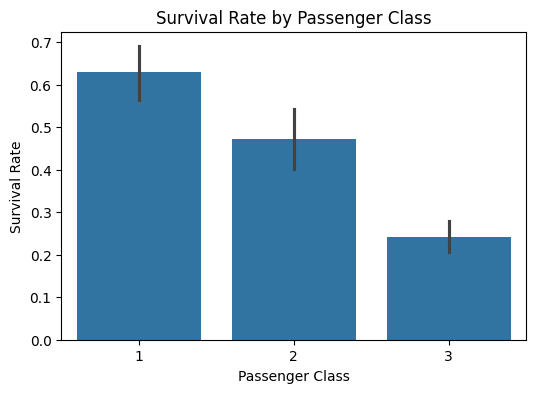

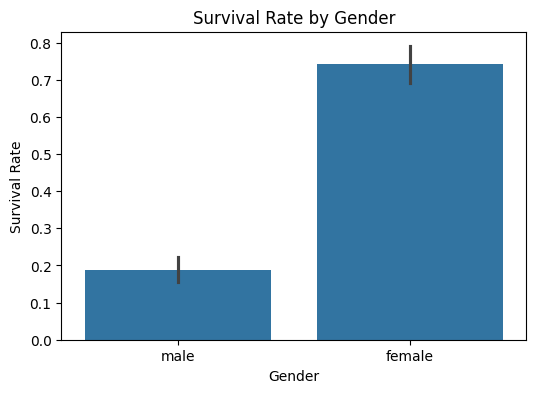

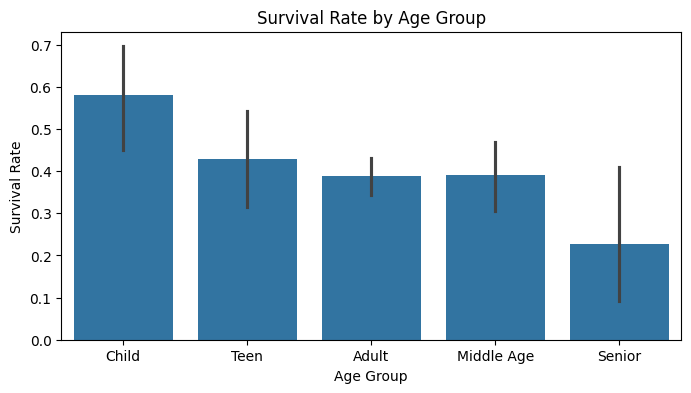

In [3]:
# Visualize survival rates by passenger class
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Visualize survival rates by gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

# Visualize survival rates by age group
titanic['age_group'] = pd.cut(titanic['age'], bins=[0,12,18,40,60,80], labels=['Child','Teen','Adult','Middle Age','Senior'])
plt.figure(figsize=(8,4))
sns.barplot(x='age_group', y='survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

## 4. Resolution: Analyzing Factors Influencing Survival

To resolve the conflict, we'll analyze which factors most strongly influenced survival. We'll use logistic regression and feature importance to draw insights and explain how some passengers overcame the odds.

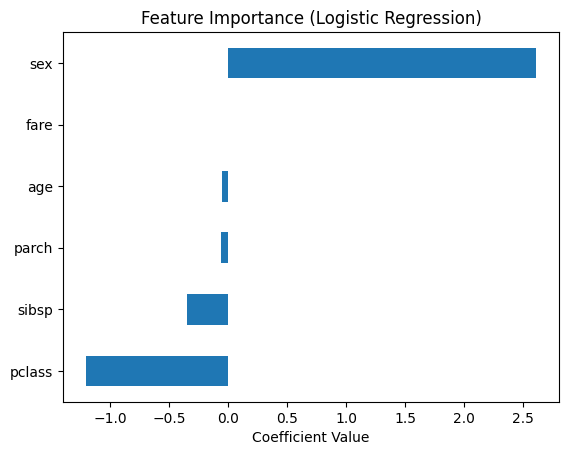

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [4]:
# Prepare data for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select features and drop missing values
features = ['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']
df = titanic[features + ['survived']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Feature importance
importance = pd.Series(model.coef_[0], index=features)
importance.sort_values().plot(kind='barh', title='Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.show()

# Classification report
preds = model.predict(X_test)
print(classification_report(y_test, preds))

## Conclusion

Through this narrative journey, we've seen how data storytelling can reveal the human stories behind the numbers. The Titanic dataset shows that survival was heavily influenced by class, gender, and age. Women, children, and first-class passengers had higher chances of survival, while men and lower-class passengers faced greater risks. By combining data exploration, visualization, and modeling, we resolved the central conflict and gained actionable insights from history.